In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd "/content/drive/MyDrive"

In [ ]:
cd "/content/drive/MyDrive/selection-of-criminals_with_syndata/CTGAN_syndata_generaton" 

In [ ]:
!pip install sdmetrics

# 3. Review generated data similarity(Coverage)

- 생성된 데이터가 포함하는 원본 데이터 값의 범위를 측정하여 통계적 유사성을 확인한다. 
- 일반적으로 생성된 데이터가 포함하는 범위가 넓을 수록 유사한 데이터라고 볼 수 있다. 
- 칼럼별로 생성된 데이터가 포함하는 범위를 측정한다. 
- 같은 데이터 레이블은 존재 하지 않는다. 

 ## Data load

In [2]:
import pandas as pd
import copy

In [3]:
df_syn_01 = pd.read_csv('./data_sample/df_syn_en_14.csv', encoding='utf-8-sig') #새로운 가상데이터

In [4]:
df_syn_base = pd.read_csv('df_syn_en.csv', encoding='utf-8-sig') #기존 가상데이터

In [5]:
copy_syn = copy.deepcopy(df_syn_01)

In [6]:
copy_base = copy.deepcopy(df_syn_base)

## 생성된 데이터의 기존 데이터 포함 범위 확인

### 카테고리 타입 데이터 커버리지 확인

This metric measures whether a synthetic column covers all the possible categories that are present in a real column.

Data Compatibility
Categorical: This metric is meant for discrete, categorical data
Boolean: This metric is meant for boolean data

Score
- (best) 1.0: The synthetic column contains all the unique categories present in the real column
- (worst) 0.0: The synthetic column contains none of the categories present in the real column
* The plot below shows some fictitious real and synthetic data (black and green respectively) with CategoryCoverage=0.6.

![Category Coverage](https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2F2yn1OQLODOesNLVjnpe2%2FCategory%20Coverage.png?alt=media&token=e12f6f08-d3b0-4e05-9a41-58b8a28d4a4e)

How does it work?
This metric first computes the number of unique categories, c, that are present in the real column r. Then it computes the number of those categories present in the synthetic column, s. It returns the proportion of real categories that are in the synthetic data.

In [7]:
# 'dec_custom_code' 칼럼의의 커버리지 점수를 구합니다. 
from sdmetrics.single_column import CategoryCoverage

CategoryCoverage.compute(
    real_data=copy_base['dec_custom_code'],
    synthetic_data=copy_syn['dec_custom_code']
)

0.5813953488372093

### 카테고리 타입의 항목별 커버리지 그래프 그리기

- 카테고리 타입의 항목별 커버리지 점수를 저장할 데이터 프레임을 생성합니다. 

In [12]:
# 카테고리 타입의 항목별 커버리지 점수를 저장할 데이터 프레임을 생성합니다. 
CC_score = pd.DataFrame({'Category':[],'Score':[]})

#카테고리 타입의 칼럼을 변수에 입력합니다. 
Range_columns = ['dec_custom_code','imp_dec_code','imp_trd_code','imp_typ_code',\
                 'collect_code','typ_transport_code','dec_mark','importer','ovs_cust_code',\
                 'exps_carr_code','HS10','country_ship_code','country_orig_code','trff_class_code',\
                 'country_orig_mark_code','crime_yn','key_exposure']

#원본 데이터의 인덱스와 값을 가지고 가상데이터와의 커버리지 점수를 구하여 데이터 프렝임에 저장합니다. 
for idx,val in enumerate(copy_base):
    score = 0 
    if val in Range_columns:
        score = CategoryCoverage.compute(
            real_data=copy_base[val],
            synthetic_data=copy_syn[val]
        )
    CC_score.loc[idx] = [val,score]

- 커버리지 점수가 담긴 데이터 프레임을 그래프화 하기 위한 라이브러리를 로드 합니다. 

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

- 계산된 커버리지 점수를 활용해 막대 그래프를 그립니다. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'dec_custom_code'),
  Text(1, 0, 'imp_dec_code'),
  Text(2, 0, 'imp_trd_code'),
  Text(3, 0, 'imp_typ_code'),
  Text(4, 0, 'collect_code'),
  Text(5, 0, 'typ_transport_code'),
  Text(6, 0, 'dec_mark'),
  Text(7, 0, 'importer'),
  Text(8, 0, 'ovs_cust_code'),
  Text(9, 0, 'exps_carr_code'),
  Text(10, 0, 'HS10'),
  Text(11, 0, 'country_ship_code'),
  Text(12, 0, 'country_orig_code'),
  Text(13, 0, 'trff_class_code'),
  Text(14, 0, 'country_orig_mark_code'),
  Text(15, 0, 'crime_yn'),
  Text(16, 0, 'key_exposure')])

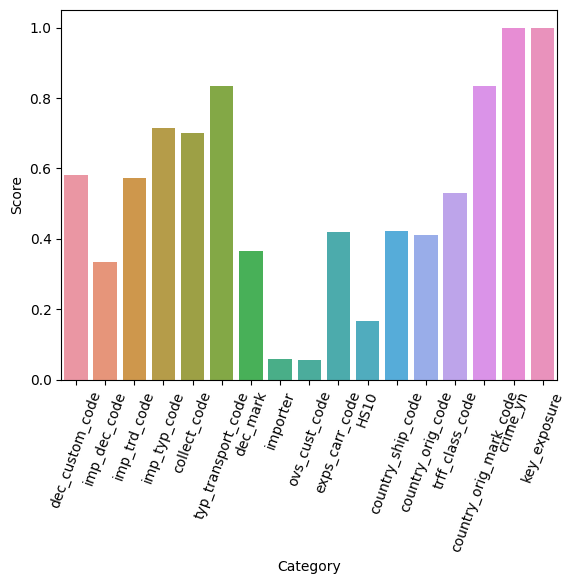

In [14]:
#카테고리 데이터의 수식상 음수는 나올 수 없기 때문에 data 변수에 음수를 제거하여 입력하는 조건을 붙였습니다. 
sns.barplot(x='Category',y ='Score', data = CC_score[CC_score['Score'] > 0])
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.xticks(rotation =70)

### 수치형 타입  데이터 커버리지 확인

This metric measures whether a synthetic column covers the full range of values that are present in a real column.

Data Compatibility
- Numerical : This metric is meant for continuous, numerical data
- Datetime : This metric converts datetime values into numerical values

Score
- (best) 1.0: The synthetic column covers the range of values present in the real column
- (worst) 0.0: The synthetic column does not overlap at all with the range of values in the real column
* The plot below shows some fictitious real and synthetic data (black and green respectively) with RangeCoverage=0.82.

![Value](https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2FUa21ikMRPxduAFIpovjM%2FRange%20Coverage.png?alt=media&token=bb7dca22-ad7d-4521-8523-e683588deb2b)

In [15]:
# 'trff_rate' 칼럼의의 커버리지 점수를 구합니다. 
from sdmetrics.single_column import RangeCoverage

RangeCoverage.compute(
    real_data=copy_base['trff_rate'],
    synthetic_data=copy_syn['trff_rate']
)

0.5001988598700783

### 수치형 타입의 항목별 커버리지 그래프 그리기

- 수치형 타입의 항목별 커버리지 점수를 저장할 데이터 프레임을 생성합니다. 

In [16]:
# 수치형 타입의 항목별 커버리지 점수를 담을 데이터 프레임을 생성합니다. 
RC_score = pd.DataFrame({'Category':[],'Score':[]})

#수치형 타입의 칼럼을 변수에 입력합니다. 
Range_columns = ['trff_rate','dec_weight','taxabal_price_KRW']

#원본 데이터의 인덱스와 값을 가지고 가상데이터와의 커버리지 점수를 구하여 데이터 프렝임에 저장합니다. 
for idx,val in enumerate(copy_base):
    score = 0 
    if val in Range_columns:
        score = RangeCoverage.compute(
            real_data=copy_base[val],
            synthetic_data=copy_syn[val]
        )
    RC_score.loc[idx] = [val,score]

- 계산된 커버리지 점수를 활용해 막대 그래프를 그립니다. 
- 세가지 값중 상대적으로 분포가 작은 'trff_rate'의 값이 높습니다.

(array([0, 1, 2]),
 [Text(0, 0, 'trff_rate'),
  Text(1, 0, 'dec_weight'),
  Text(2, 0, 'taxabal_price_KRW')])

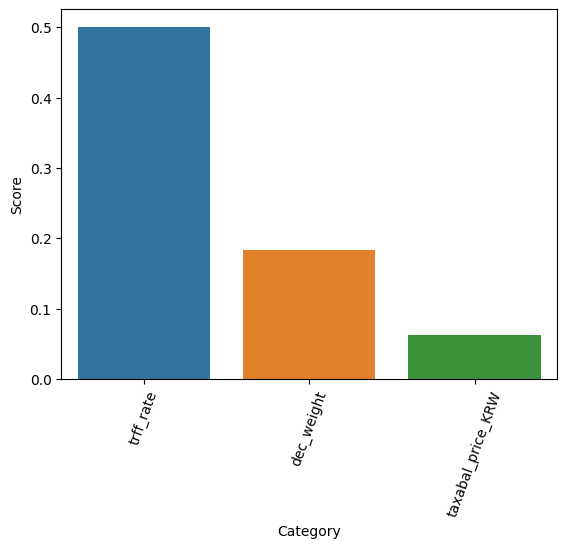

In [17]:
sns.barplot(x='Category',y ='Score', data = RC_score[RC_score['Score'] > 0])
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.xticks(rotation =70)

## 결과 통합하기

### 두개의 결과 데이터 프레임을 결합하기

- CC_score의 'trff_rate','dec_weight','taxabal_price_KRW' 칼럼에 RC_score가 가지고 있는 값을 대입한다. 

In [18]:
CC_score.loc[[15,18,19],'Score'] = RC_score.loc[[15,18,19],'Score']

- 전체 score를 확인합니다. 
- 대체적으로 50%가 넘는 비율을 갖고 있습니다. 
- 고유값의 종류가 적은 코드성 데이터 일 수록 높은 커버범위를 보여주는 경향을 확인할 수 있습니다. 
- 'imp_dec_code'는 3가지 값중에 한가지 값에 편향되어 있어 낮은 커버범위를 보입니다. 

In [21]:
#'imp_dec_code'의 고유값 카운트 
copy_base['imp_dec_code'].value_counts()

B    53992
D        7
A        1
Name: imp_dec_code, dtype: int64

In [19]:
Total_score = CC_score

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'dec_custom_code'),
  Text(1, 0, 'imp_dec_code'),
  Text(2, 0, 'imp_trd_code'),
  Text(3, 0, 'imp_typ_code'),
  Text(4, 0, 'collect_code'),
  Text(5, 0, 'typ_transport_code'),
  Text(6, 0, 'dec_mark'),
  Text(7, 0, 'importer'),
  Text(8, 0, 'ovs_cust_code'),
  Text(9, 0, 'exps_carr_code'),
  Text(10, 0, 'HS10'),
  Text(11, 0, 'country_ship_code'),
  Text(12, 0, 'country_orig_code'),
  Text(13, 0, 'trff_rate'),
  Text(14, 0, 'trff_class_code'),
  Text(15, 0, 'country_orig_mark_code'),
  Text(16, 0, 'dec_weight'),
  Text(17, 0, 'taxabal_price_KRW'),
  Text(18, 0, 'crime_yn'),
  Text(19, 0, 'key_exposure')])

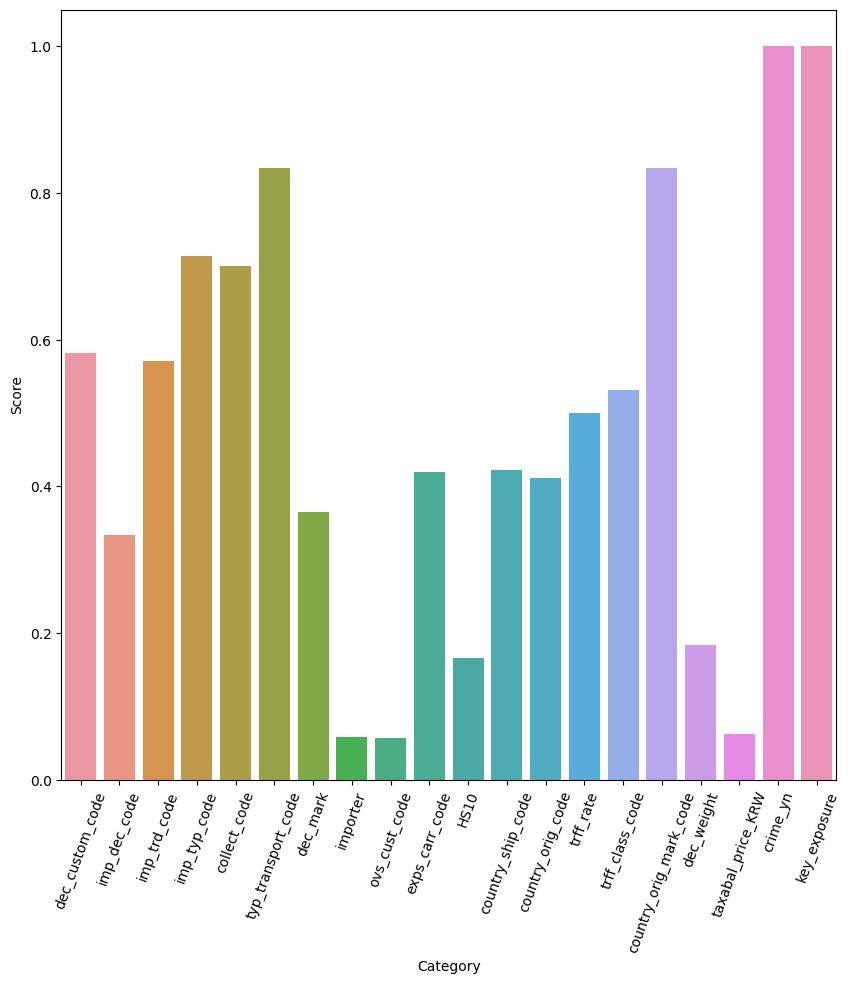

In [20]:
plt.figure(figsize=(10,10))
colors = sns.color_palette('Greys', 1)
sns.barplot(x='Category',y ='Score', data = Total_score[Total_score['Score'] > 0])
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.xticks(rotation =70)